# IMPORT LIBRARIES

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import optuna

# IMPORT DATASETS

In [16]:
features_df = pd.read_csv("data-analytics-competition-find-it-2024/train_features.csv")
test = pd.read_csv("data-analytics-competition-find-it-2024/test_features.csv")
labels = pd.read_csv("data-analytics-competition-find-it-2024/train_labels.csv")

In [17]:
df = pd.concat([features_df, labels], axis=1)

# DATA PREP

In [18]:
df

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


In [19]:
labels

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4
...,...
3812,5
3813,1
3814,0
3815,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [21]:
df.describe()

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
count,3817.000000,3.627000e+03,3627.000000,3613.000000,3645.000000,3636.000000,3.639000e+03,3624.000000,3603.000000,3639.000000,3652.000000,3648.000000,3621.000000,3817.000000
mean,1967.823946,1.144832e+08,0.293080,0.353723,47.231550,59804.239824,4.385748e+05,81428.997792,63377.970580,2.125584,4.436473,5.767818,0.004971,2.585800
std,11.768131,4.346042e+07,0.473063,0.493014,27.068512,74024.976109,5.120427e+05,99976.226855,79435.457282,2.100133,3.002522,3.210738,0.070340,2.101845
min,1899.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,8.112512e+07,0.000000,0.000000,25.000000,7907.000000,4.947950e+04,10115.000000,7947.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,1968.000000,1.156214e+08,0.000000,0.000000,47.000000,26456.000000,2.219930e+05,36054.500000,27795.000000,2.000000,4.000000,5.000000,0.000000,3.000000
75%,1976.000000,1.504960e+08,1.000000,1.000000,69.000000,86162.000000,6.863555e+05,121380.000000,89502.500000,3.000000,7.000000,8.000000,0.000000,4.000000
max,2000.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000,6.000000


In [22]:
df.describe(include=["object", "category"])

,pendidikan,status_pernikahan,tanggal_menjadi_anggota
count,3628,3605,1065
unique,6,6,564
top,Sarjana,Rencana Menikah,2013-05-17
freq,1841,1271,6


In [23]:
pie1 = pd.DataFrame(df["jumlah_promosi"].value_counts())
pie1

,count
jumlah_promosi,
0,983
5,557
1,515
4,515
3,472
2,389
6,386


In [24]:
pie1_vc = df["jumlah_promosi"].value_counts()
for i in pie1_vc.index:
    print(i, "=", round(pie1_vc[i]/pie1_vc.sum()*100, 2), "%")

0 = 25.75 %
5 = 14.59 %
1 = 13.49 %
4 = 13.49 %
3 = 12.37 %
2 = 10.19 %
6 = 10.11 %


In [25]:
pie1.columns

Index(['count'], dtype='object')

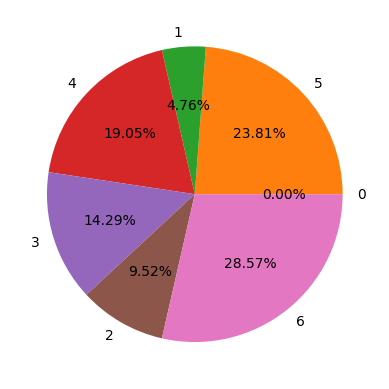

In [26]:
plt.pie(x=pie1.index, labels=pie1.index, autopct='%.2f%%')
plt.show()


## DATA_PREP FUNC

In [27]:
from sklearn.impute import KNNImputer, SimpleImputer
kimputer = KNNImputer()
simputer = SimpleImputer(strategy="most_frequent")

def impute_df(df):
    dfCopy = df.copy()
    cat_cols = dfCopy.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = dfCopy.select_dtypes(include=["number"]).columns.tolist()
    for col in cat_cols:
        imputed = simputer.fit_transform(dfCopy[[col]])
        # print(imputed.shape)
        # print(dfCopy[col].shape)
        dfCopy[[col]] = imputed
    for col in num_cols:
        imputed = kimputer.fit_transform(dfCopy[[col]])
        dfCopy[[col]] = imputed
    return dfCopy

def detect_outliers_stddev(data, threshold=3):
    outliers_mask = abs(data - data.mean()) > threshold * data.std()
    return outliers_mask

def rounding_col(df, colname):
        df[colname] = df[colname].round().astype(int)
        # print(df[colname].value_counts())

def data_prep(df):
    
    dfCopy = df.copy()
    
    if ("ID" in dfCopy.columns.tolist()):
        dfCopy.drop(columns="ID", inplace=True)
        
    if ("tanggal_menjadi_anggota" in dfCopy.columns.tolist()):
        dfCopy.drop(columns="tanggal_menjadi_anggota", inplace=True);
    
    # Handling Null Values
    
    '''
    Inconsistency yang 5 dihandle di sini buat ubah pake imputer
    '''
    dfCopy.loc[dfCopy["pendidikan"] == "5"] = np.nan
    dfCopy.loc[dfCopy["status_pernikahan"] == "5"] = np.nan
    
    print("Null Values Before Impute:")
    print(df.isnull().sum())
    dfCopy = impute_df(dfCopy)
    print("Null Values After Impute:")
    print(df.isnull().sum())
    
    # Checking Duplicates
    print(dfCopy.duplicated().sum())
    
    # Handling Outliers
    if ("jumlah_promosi" in dfCopy.columns.tolist()):
        outliers_mask = detect_outliers_stddev(dfCopy[dfCopy.select_dtypes(include=["number"]).columns.difference(["keluhan", "jumlah_promosi"])])
        outlier_values = dfCopy[outliers_mask]
        print("Outliers in every column: ")
        print(outlier_values.count())
        print("Histogram of most skewed column")
        plt.figure(figsize=(10, 6))  # Set figure size
        sns.histplot(dfCopy["pendapatan"], bins=10, kde=True, label="pendapatan", alpha=0.5)

        plt.xlabel('Value')  # Set x-axis label
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title('Histogram Pendapatan')  # Set title
        plt.legend()  # Show legend
        plt.show()
        
        dfCopy = dfCopy[~outliers_mask.any(axis=1)]
    
    # Handling Inconsistencies
    
    '''
    Inconsistency bagian ini diubah jadi imputing aja di atas
    # dfCopy = dfCopy.loc[dfCopy["pendidikan"]!="5"]
    # dfCopy["pendidikan"].value_counts()

    # dfCopy = dfCopy.loc[dfCopy["status_pernikahan"]!="5"]
    # dfCopy["status_pernikahan"].value_counts()
    '''
        
    rounding_col(dfCopy, "jumlah_anak_balita")
    rounding_col(dfCopy, "jumlah_anak_remaja")
    rounding_col(dfCopy, "terakhir_belanja")
    rounding_col(dfCopy, "pembelian_diskon")
    rounding_col(dfCopy, "pembelian_toko")
    rounding_col(dfCopy, "pembelian_web")
    rounding_col(dfCopy, "keluhan") # keluhan yg pecahan diround aja, biar ga ngedrop row di test
    if ("jumlah_promosi" in dfCopy.columns.tolist()):
        print(dfCopy["jumlah_promosi"].value_counts())
        rounding_col(dfCopy, "jumlah_promosi")
        print(dfCopy["jumlah_promosi"].value_counts())
    
    # if (type(target_col) != str):
    #     dfCopy["jumlah_promosi"] = target_col
    return dfCopy
    
    

Null Values Before Impute:
tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64
Null Values After Impute:
tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembel

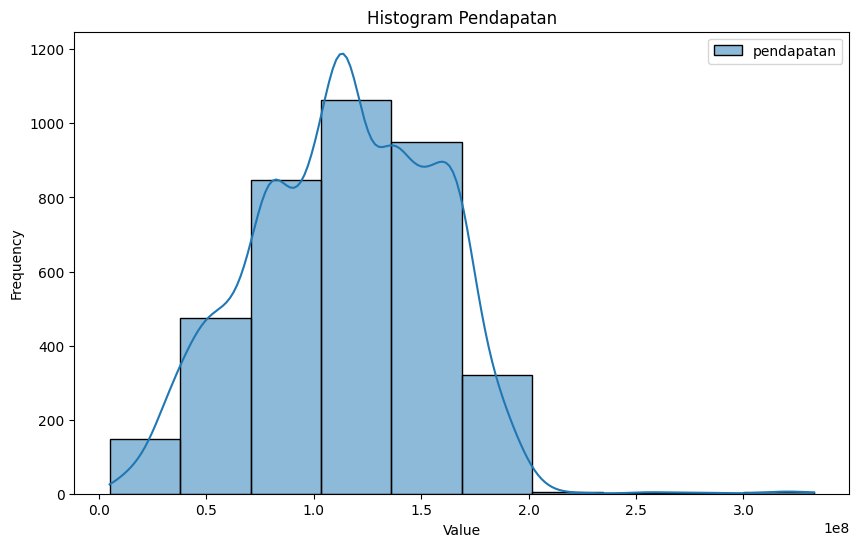

jumlah_promosi
0.000000    867
5.000000    531
4.000000    474
1.000000    465
3.000000    440
2.000000    349
6.000000    348
2.587834      3
Name: count, dtype: int64
jumlah_promosi
0    867
5    531
4    474
1    465
3    443
2    349
6    348
Name: count, dtype: int64


In [28]:
df_prep = data_prep(df)

In [29]:
df_prep.isnull().sum()

tahun_kelahiran       0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64

In [30]:
df_prep["jumlah_promosi"].value_counts()

jumlah_promosi
0    867
5    531
4    474
1    465
3    443
2    349
6    348
Name: count, dtype: int64

# FEATURE ENGINEERING

Fitur baru yang bisa dibuat berdasarkan fitur yang sudah ada:

1. Umur
2. Kategori Umur
3. Kategori Pendapatan
4. Pelanggan Aktif
5. Belanja Terbesar
6. Preferensi Metode Pembelian

In [31]:
from sklearn.preprocessing import StandardScaler

def feat_eng(df):
    dfCopy = df.copy()
    target_col = "empty"
    
    if ("jumlah_promosi" in dfCopy.columns.tolist()):
        target_col = dfCopy["jumlah_promosi"]
        print(dfCopy.info())
        dfCopy.drop(columns="jumlah_promosi", inplace=True)
    
    # FEATURE CREATION
    #buat fitur umur
    dfCopy["umur"] = 2024 - dfCopy["tahun_kelahiran"]
    #buat fitur kategori umur
    dfCopy["kategori_umur"] = pd.cut(dfCopy["umur"], bins=[0,20,65,float("inf")], labels = ["muda", "tua", "lansia"], right=False)
    #buat fitur kategori pendapatan
    dfCopy["kategori_pendapatan"] = pd.cut(dfCopy["pendapatan"], bins=[0,24e6,120e6,float("inf")], labels = ["bawah", "menengah", "atas"], right=False)
    #buat fitur pelanggan_aktif
    dfCopy["pelanggan_aktif"] = pd.cut(dfCopy["terakhir_belanja"], bins=[0,30,float("inf")], labels = ["1", "0"], right=False)
    #buat fitur belanja terbesar
    dfCopy["belanja_terbesar"] = dfCopy[["belanja_buah", "belanja_daging", "belanja_ikan", "belanja_kue"]].idxmax(axis=1)
    #buat fitur preferensi metode pembelian
    dfCopy["preferensi_metode_pembelian"] = dfCopy[["pembelian_web", "pembelian_toko"]].idxmax(axis=1)
    #buat fitur pelanggan aktif
    dfCopy["pelanggan_aktif"] = pd.cut(dfCopy["terakhir_belanja"], bins=[0,2,float("inf")], labels = ["0", "1"], right=False)
    
    #tampilkan hasil FEATURE CREATION
    # print(dfCopy)
    
    # ONE HOT ENCODING
    cat_cols = dfCopy.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        ohe = pd.get_dummies(dfCopy[col], prefix=col, prefix_sep="_")
        dfCopy = pd.concat([dfCopy, ohe], axis=1)
        dfCopy.drop(columns=[col], inplace=True)
    
    # if ("jumlah_promosi" in cat_cols):
    #     dfCopy["jumlah_promosi_new"] = dfCopy["jumlah_promosi"]
    #     dfCopy = dfCopy.drop(columns="jumlah_promosi")
    #     dfCopy = dfCopy.rename(columns={"jumlah_promosi_new":"jumlah_promosi"})
    #     dfCopy.columns
    # #tampilkan hasil ONE HOT ENCODING
    # print(dfCopy)
    
    # FEATURE SCALING
    scaler = StandardScaler()

    # Scale the data
    # if ("jumlah_promosi" in cat_cols):
    #     features = dfCopy.drop(columns=["jumlah_promosi"]).columns.tolist()
    # else:
    scaled_data = scaler.fit_transform(dfCopy[dfCopy.columns.tolist()])

    dfCopy[dfCopy.columns.tolist()] = scaled_data
    
    #tampilkan hasil FEATURE SCALING
    # print(dfCopy)
    
    if (type(target_col) != str):
        dfCopy["jumlah_promosi"] = target_col
    
    return dfCopy

In [32]:
df_final = feat_eng(df_prep)
df_final

<class 'pandas.core.frame.DataFrame'>
Index: 3477 entries, 0 to 3815
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tahun_kelahiran     3477 non-null   float64
 1   pendidikan          3477 non-null   object 
 2   status_pernikahan   3477 non-null   object 
 3   pendapatan          3477 non-null   float64
 4   jumlah_anak_balita  3477 non-null   int32  
 5   jumlah_anak_remaja  3477 non-null   int32  
 6   terakhir_belanja    3477 non-null   int32  
 7   belanja_buah        3477 non-null   float64
 8   belanja_daging      3477 non-null   float64
 9   belanja_ikan        3477 non-null   float64
 10  belanja_kue         3477 non-null   float64
 11  pembelian_diskon    3477 non-null   int32  
 12  pembelian_web       3477 non-null   int32  
 13  pembelian_toko      3477 non-null   int32  
 14  keluhan             3477 non-null   int32  
 15  jumlah_promosi      3477 non-null   int32  
dtypes: float64(

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,...,kategori_pendapatan_atas,pelanggan_aktif_0,pelanggan_aktif_1,belanja_terbesar_belanja_buah,belanja_terbesar_belanja_daging,belanja_terbesar_belanja_ikan,belanja_terbesar_belanja_kue,preferensi_metode_pembelian_pembelian_toko,preferensi_metode_pembelian_pembelian_web,jumlah_promosi
0,0.989977,0.060383,-0.618470,1.417882,-0.014328,-0.031425,-0.299137,-0.261884,-0.542376,-0.027201,...,-0.851797,-0.125601,0.125601,-0.168505,0.387533,-0.264906,-0.197081,0.867988,-0.867988,2
2,-0.173199,0.379219,-0.618470,-0.705277,-0.090332,1.083550,-0.289068,0.280297,1.371131,-0.580280,...,1.173988,-0.125601,0.125601,-0.168505,0.387533,-0.264906,-0.197081,0.867988,-0.867988,1
3,-0.620574,1.309381,-0.618470,-0.705277,1.619737,2.559433,2.732730,-0.532584,1.070311,-1.133359,...,1.173988,-0.125601,0.125601,-0.168505,0.387533,-0.264906,-0.197081,0.867988,-0.867988,4
4,0.184702,0.138913,1.616894,1.417882,1.163719,0.633675,-0.185318,-0.382923,-0.334069,2.738195,...,-0.851797,-0.125601,0.125601,-0.168505,0.387533,-0.264906,-0.197081,-1.152089,1.152089,4
5,-1.425850,-0.432113,-0.618470,-0.705277,-1.458387,-0.315275,-0.773635,-0.861037,0.116701,-0.580280,...,-0.851797,-0.125601,0.125601,-0.168505,-2.580424,-0.264906,5.074067,-1.152089,1.152089,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,1.974203,-1.509328,-0.618470,-0.705277,-1.800400,-0.670727,-0.865819,-0.765172,0.116701,-1.133359,...,-0.851797,7.961714,-7.961714,-0.168505,-2.580424,-0.264906,5.074067,0.867988,-0.867988,0
3811,1.795253,1.296543,-0.618470,-0.705277,-1.382384,-0.251955,0.749822,-0.321035,-0.058698,-0.580280,...,1.173988,-0.125601,0.125601,-0.168505,0.387533,-0.264906,-0.197081,0.867988,-0.867988,5
3812,-1.157424,-0.826860,-0.618470,-0.705277,-0.546350,-0.771670,-0.825739,-0.815355,-0.762911,1.632037,...,-0.851797,-0.125601,0.125601,-0.168505,0.387533,-0.264906,-0.197081,-1.152089,1.152089,5
3813,-1.873225,-0.066378,-0.618470,1.417882,-0.128333,-0.872612,-0.770616,0.103464,-0.851210,0.525878,...,-0.851797,-0.125601,0.125601,-0.168505,-2.580424,3.774917,-0.197081,-1.152089,1.152089,1


In [33]:
df_final.describe(include="all")

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,...,kategori_pendapatan_atas,pelanggan_aktif_0,pelanggan_aktif_1,belanja_terbesar_belanja_buah,belanja_terbesar_belanja_daging,belanja_terbesar_belanja_ikan,belanja_terbesar_belanja_kue,preferensi_metode_pembelian_pembelian_toko,preferensi_metode_pembelian_pembelian_web,jumlah_promosi
count,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,...,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3477.000000
mean,-3.336097e-15,-3.657957e-16,-5.287689e-17,-4.087102e-17,1.062647e-16,-3.065327e-18,6.999163e-17,-2.963149e-17,3.678392e-17,9.298158e-17,...,-1.083082e-16,-1.634841e-17,3.657957e-16,-5.824121e-17,6.130653e-17,-1.226131e-17,6.794808e-17,3.269682e-17,-3.269682e-17,2.626114
std,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,...,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,2.094979
min,-2.499550e+00,-2.571946e+00,-6.184699e-01,-7.052773e-01,-1.800400e+00,-8.726123e-01,-8.839524e-01,-8.610365e-01,-8.512101e-01,-1.133359e+00,...,-8.517971e-01,-1.256011e-01,-7.961714e+00,-1.685051e-01,-2.580424e+00,-2.649065e-01,-1.970806e-01,-1.152089e+00,-8.679884e-01,0.000000
25%,-7.995240e-01,-7.564127e-01,-6.184699e-01,-7.052773e-01,-8.123606e-01,-7.380223e-01,-7.751494e-01,-7.412061e-01,-7.276763e-01,-5.802797e-01,...,-8.517971e-01,-1.256011e-01,1.256011e-01,-1.685051e-01,3.875331e-01,-2.649065e-01,-1.970806e-01,-1.152089e+00,-8.679884e-01,1.000000
50%,5.751647e-03,6.038258e-02,-6.184699e-01,-7.052773e-01,-1.432845e-02,-4.106452e-01,-3.979045e-01,-4.296469e-01,-4.061404e-01,-2.720061e-02,...,-8.517971e-01,-1.256011e-01,1.256011e-01,-1.685051e-01,3.875331e-01,-2.649065e-01,-1.970806e-01,8.679884e-01,-8.679884e-01,3.000000
75%,7.215522e-01,7.511273e-01,1.616894e+00,1.417882e+00,7.837037e-01,3.386977e-01,3.722743e-01,3.743128e-01,2.975229e-01,5.258785e-01,...,1.173988e+00,-1.256011e-01,1.256011e-01,-1.685051e-01,3.875331e-01,-2.649065e-01,-1.970806e-01,8.679884e-01,1.152089e+00,5.000000
max,2.868954e+00,2.764798e+00,1.616894e+00,1.417882e+00,2.911789e+00,3.718384e+00,3.430620e+00,3.540988e+00,3.635164e+00,3.291274e+00,...,1.173988e+00,7.961714e+00,1.256011e-01,5.934539e+00,3.875331e-01,3.774917e+00,5.074067e+00,8.679884e-01,1.152089e+00,6.000000


In [34]:
df_final.isnull().sum()

tahun_kelahiran                               0
pendapatan                                    0
jumlah_anak_balita                            0
jumlah_anak_remaja                            0
terakhir_belanja                              0
belanja_buah                                  0
belanja_daging                                0
belanja_ikan                                  0
belanja_kue                                   0
pembelian_diskon                              0
pembelian_web                                 0
pembelian_toko                                0
keluhan                                       0
umur                                          0
pendidikan_Doktor                             0
pendidikan_Magister                           0
pendidikan_SMA                                0
pendidikan_SMP                                0
pendidikan_Sarjana                            0
status_pernikahan_Cerai                       0
status_pernikahan_Cerai Mati            

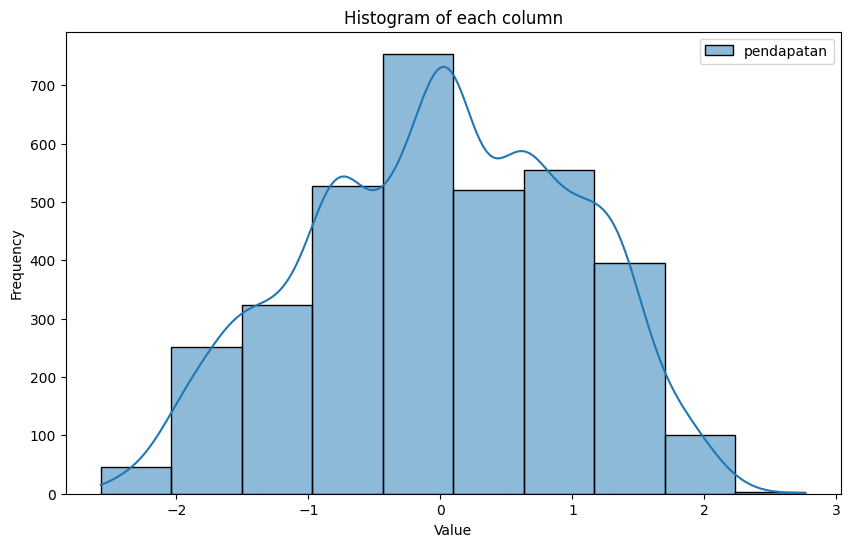

In [35]:
# Create histograms for each column
plt.figure(figsize=(10, 6))  # Set figure size
# for column in df_imputed.columns:
sns.histplot(df_final["pendapatan"], bins=10, kde=True, label="pendapatan", alpha=0.5)

plt.xlabel('Value')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Histogram of each column')  # Set title
plt.legend()  # Show legend
plt.show()

In [36]:
df_final.columns

Index(['tahun_kelahiran', 'pendapatan', 'jumlah_anak_balita',
       'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah',
       'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pembelian_diskon',
       'pembelian_web', 'pembelian_toko', 'keluhan', 'umur',
       'pendidikan_Doktor', 'pendidikan_Magister', 'pendidikan_SMA',
       'pendidikan_SMP', 'pendidikan_Sarjana', 'status_pernikahan_Cerai',
       'status_pernikahan_Cerai Mati', 'status_pernikahan_Menikah',
       'status_pernikahan_Rencana Menikah', 'status_pernikahan_Sendiri',
       'kategori_umur_muda', 'kategori_umur_tua', 'kategori_umur_lansia',
       'kategori_pendapatan_bawah', 'kategori_pendapatan_menengah',
       'kategori_pendapatan_atas', 'pelanggan_aktif_0', 'pelanggan_aktif_1',
       'belanja_terbesar_belanja_buah', 'belanja_terbesar_belanja_daging',
       'belanja_terbesar_belanja_ikan', 'belanja_terbesar_belanja_kue',
       'preferensi_metode_pembelian_pembelian_toko',
       'preferensi_metode_pembeli

## LABEL CORRELATION

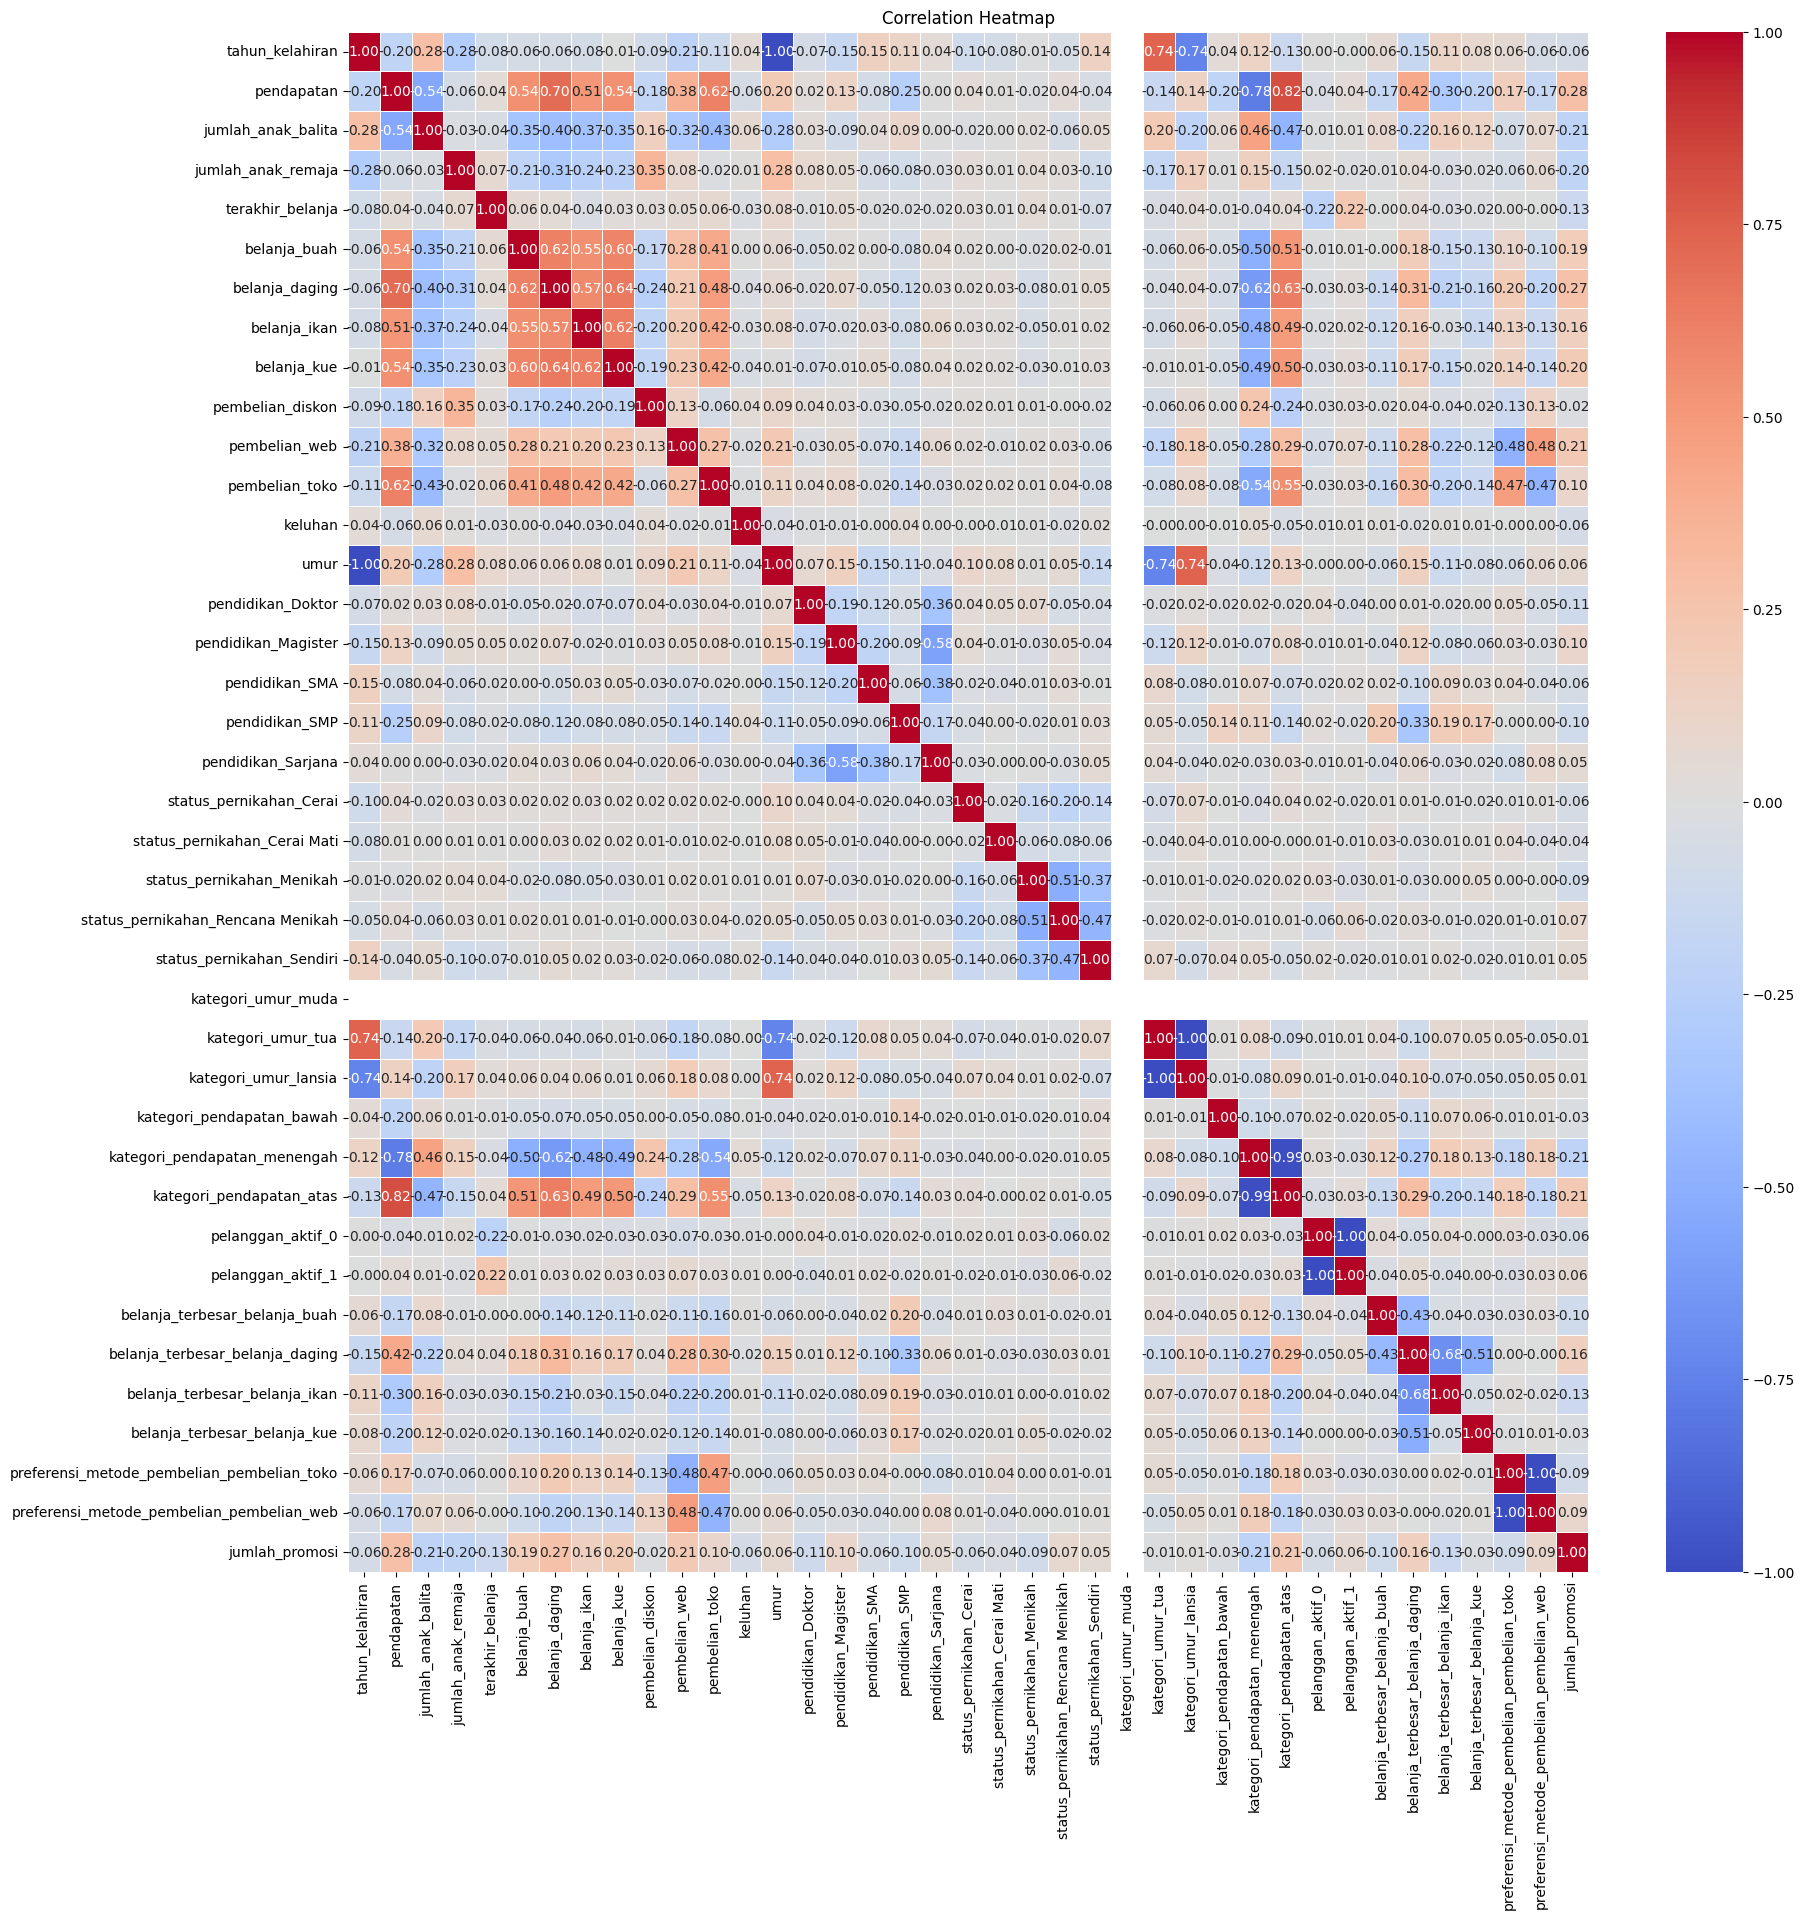

In [37]:
# Calculate the correlation matrix
correlation_matrix = df_final.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
# correlation_with_target = df_final.corr()['jumlah_promosi'].abs()

# columns_to_drop = correlation_with_target[correlation_with_target < 0.25].index
# df_final.drop(columns=columns_to_drop, inplace=True)

# df_final

In [39]:
df_final.describe()

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,...,kategori_pendapatan_atas,pelanggan_aktif_0,pelanggan_aktif_1,belanja_terbesar_belanja_buah,belanja_terbesar_belanja_daging,belanja_terbesar_belanja_ikan,belanja_terbesar_belanja_kue,preferensi_metode_pembelian_pembelian_toko,preferensi_metode_pembelian_pembelian_web,jumlah_promosi
count,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,...,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3.477000e+03,3477.000000
mean,-3.336097e-15,-3.657957e-16,-5.287689e-17,-4.087102e-17,1.062647e-16,-3.065327e-18,6.999163e-17,-2.963149e-17,3.678392e-17,9.298158e-17,...,-1.083082e-16,-1.634841e-17,3.657957e-16,-5.824121e-17,6.130653e-17,-1.226131e-17,6.794808e-17,3.269682e-17,-3.269682e-17,2.626114
std,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,...,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,2.094979
min,-2.499550e+00,-2.571946e+00,-6.184699e-01,-7.052773e-01,-1.800400e+00,-8.726123e-01,-8.839524e-01,-8.610365e-01,-8.512101e-01,-1.133359e+00,...,-8.517971e-01,-1.256011e-01,-7.961714e+00,-1.685051e-01,-2.580424e+00,-2.649065e-01,-1.970806e-01,-1.152089e+00,-8.679884e-01,0.000000
25%,-7.995240e-01,-7.564127e-01,-6.184699e-01,-7.052773e-01,-8.123606e-01,-7.380223e-01,-7.751494e-01,-7.412061e-01,-7.276763e-01,-5.802797e-01,...,-8.517971e-01,-1.256011e-01,1.256011e-01,-1.685051e-01,3.875331e-01,-2.649065e-01,-1.970806e-01,-1.152089e+00,-8.679884e-01,1.000000
50%,5.751647e-03,6.038258e-02,-6.184699e-01,-7.052773e-01,-1.432845e-02,-4.106452e-01,-3.979045e-01,-4.296469e-01,-4.061404e-01,-2.720061e-02,...,-8.517971e-01,-1.256011e-01,1.256011e-01,-1.685051e-01,3.875331e-01,-2.649065e-01,-1.970806e-01,8.679884e-01,-8.679884e-01,3.000000
75%,7.215522e-01,7.511273e-01,1.616894e+00,1.417882e+00,7.837037e-01,3.386977e-01,3.722743e-01,3.743128e-01,2.975229e-01,5.258785e-01,...,1.173988e+00,-1.256011e-01,1.256011e-01,-1.685051e-01,3.875331e-01,-2.649065e-01,-1.970806e-01,8.679884e-01,1.152089e+00,5.000000
max,2.868954e+00,2.764798e+00,1.616894e+00,1.417882e+00,2.911789e+00,3.718384e+00,3.430620e+00,3.540988e+00,3.635164e+00,3.291274e+00,...,1.173988e+00,7.961714e+00,1.256011e-01,5.934539e+00,3.875331e-01,3.774917e+00,5.074067e+00,8.679884e-01,1.152089e+00,6.000000


In [40]:
df_final["jumlah_promosi"].value_counts()

jumlah_promosi
0    867
5    531
4    474
1    465
3    443
2    349
6    348
Name: count, dtype: int64

In [41]:
df_final["jumlah_promosi"].value_counts()

jumlah_promosi
0    867
5    531
4    474
1    465
3    443
2    349
6    348
Name: count, dtype: int64

In [42]:
categories = [0, 1, 2, 3, 4, 5, 6]
df_final["jumlah_promosi"] = pd.Categorical(df_final["jumlah_promosi"], categories=categories)

In [43]:
df_final["jumlah_promosi"].value_counts()

jumlah_promosi
0    867
5    531
4    474
1    465
3    443
2    349
6    348
Name: count, dtype: int64

# MODEL CREATION

GradientBoost

RandomForest

In [44]:
model_dict = {0: "xgb",
              1: "rf",
              2: "catboost"}

In [46]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [47]:
from sklearn.model_selection import train_test_split

final_features = df_final.drop(columns="jumlah_promosi").columns.tolist()
target = "jumlah_promosi"

X = df_final[final_features]
y = df_final[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3477 entries, 0 to 3815
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   tahun_kelahiran                             3477 non-null   float64 
 1   pendapatan                                  3477 non-null   float64 
 2   jumlah_anak_balita                          3477 non-null   float64 
 3   jumlah_anak_remaja                          3477 non-null   float64 
 4   terakhir_belanja                            3477 non-null   float64 
 5   belanja_buah                                3477 non-null   float64 
 6   belanja_daging                              3477 non-null   float64 
 7   belanja_ikan                                3477 non-null   float64 
 8   belanja_kue                                 3477 non-null   float64 
 9   pembelian_diskon                            3477 non-null   float64 
 10  pembe

In [49]:
y_train

2937    6
1324    3
3771    5
3559    2
670     4
       ..
1199    5
1236    5
1423    6
941     0
3481    5
Name: jumlah_promosi, Length: 2781, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [50]:
y_val

3633    5
1571    3
338     4
1445    6
3328    6
       ..
600     3
846     5
3149    4
1238    0
621     5
Name: jumlah_promosi, Length: 696, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [51]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
# X_val, y_val = smote.fit_resample(X_val, y_val)

In [52]:
X_train.shape

(4977, 38)

In [53]:
y_train.value_counts()

jumlah_promosi
0    711
1    711
2    711
3    711
4    711
5    711
6    711
Name: count, dtype: int64

In [55]:
import xgboost as xgb

xgb_c = xgb.XGBClassifier(n_estimators=25, objective="multi:softmax",
                          num_class=7, eval_metric="merror",
                          early_stopping_rounds = 2, learning_rate = 0.2,
                          random_state=0)

xgb_c.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
          verbose=5)

[0]	validation_0-merror:0.41089	validation_1-merror:0.58190
[5]	validation_0-merror:0.23388	validation_1-merror:0.44109
[6]	validation_0-merror:0.21700	validation_1-merror:0.44971


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=25,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_c = RandomForestClassifier(n_estimators=25, random_state=0)

rf_c.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [57]:
from catboost import CatBoostClassifier

catboost_c = CatBoostClassifier(iterations=50, depth=5, learning_rate=0.2, loss_function="MultiClass", random_state=0)

catboost_c.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=5, verbose=5)

0:	learn: 1.8790701	test: 1.8933407	best: 1.8933407 (0)	total: 182ms	remaining: 8.94s
5:	learn: 1.6699226	test: 1.7318133	best: 1.7318133 (5)	total: 263ms	remaining: 1.93s
10:	learn: 1.5234079	test: 1.6258094	best: 1.6258094 (10)	total: 346ms	remaining: 1.23s
15:	learn: 1.4390467	test: 1.5713756	best: 1.5713756 (15)	total: 414ms	remaining: 879ms
20:	learn: 1.3578968	test: 1.5215261	best: 1.5215261 (20)	total: 479ms	remaining: 662ms
25:	learn: 1.3004711	test: 1.4866288	best: 1.4866288 (25)	total: 542ms	remaining: 500ms
30:	learn: 1.2492273	test: 1.4527283	best: 1.4527283 (30)	total: 606ms	remaining: 371ms
35:	learn: 1.2014444	test: 1.4218958	best: 1.4218958 (35)	total: 681ms	remaining: 265ms
40:	learn: 1.1566199	test: 1.3985756	best: 1.3985756 (40)	total: 748ms	remaining: 164ms
45:	learn: 1.1107720	test: 1.3724024	best: 1.3724024 (45)	total: 815ms	remaining: 70.9ms
49:	learn: 1.0707789	test: 1.3437302	best: 1.3437302 (49)	total: 863ms	remaining: 0us

bestTest = 1.343730159
bestIteration

### SVM

In [59]:
from sklearn import svm 

support = svm.LinearSVC(random_state=0)

support.fit(X_train, y_train)
predicted= support.predict(X_val)
score=accuracy_score(y_val, predicted)
print("score", score)
print("predicted", predicted)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


score 0.3793103448275862
predicted [6 0 4 0 2 5 3 4 4 3 0 1 3 0 0 2 5 4 0 2 0 5 0 2 2 3 4 4 4 0 6 1 4 4 2 0 3
 5 2 2 2 4 6 5 0 0 4 0 5 6 5 4 2 6 1 2 5 0 6 5 5 2 0 0 2 2 4 4 2 3 5 3 6 0
 5 6 6 3 2 3 6 4 4 6 5 3 4 2 4 4 0 5 2 6 4 2 2 6 0 4 2 2 0 2 4 3 0 4 5 6 6
 4 6 4 5 1 4 4 1 5 6 3 5 0 4 2 0 1 5 6 5 3 5 0 0 2 5 0 4 0 6 4 2 2 4 5 6 4
 5 0 2 2 6 5 6 5 2 4 2 2 6 0 5 2 4 3 2 5 0 4 5 0 5 5 2 6 0 3 0 3 6 5 4 0 5
 0 3 4 4 4 3 4 4 2 2 3 6 5 5 2 3 6 4 3 2 4 6 1 4 4 0 5 4 1 2 0 5 5 6 2 6 2
 3 0 2 5 5 0 3 5 0 1 4 0 2 5 4 4 3 3 2 4 5 5 3 0 3 4 0 0 4 0 0 3 2 3 4 2 0
 6 5 3 0 0 3 5 3 2 6 0 0 4 4 5 0 3 0 4 3 5 4 0 1 6 0 5 3 3 4 3 3 4 5 5 0 2
 3 0 2 4 5 2 6 3 1 3 2 2 4 4 5 1 4 4 3 0 4 4 4 2 5 6 6 0 2 3 6 3 0 0 2 5 5
 4 5 4 4 5 5 5 6 1 6 1 3 5 5 3 4 5 0 3 2 2 1 0 4 4 5 4 3 3 4 2 6 5 6 2 3 4
 3 5 0 0 4 4 5 4 5 3 5 2 5 3 3 4 0 1 3 4 6 5 3 3 3 3 4 0 3 2 4 3 0 6 2 1 3
 0 3 4 4 4 4 3 4 5 4 2 5 6 4 4 5 6 4 1 6 6 5 4 0 6 4 0 4 2 6 6 6 5 4 4 3 3
 4 4 5 4 3 6 4 0 2 6 6 5 4 4 4 2 6 3 4 5 6 4 6 4 5 5 5 4 3 4 5 2 

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### ORIGINAL EVALUATION

In [60]:
# ORIGINAL MODELS PERFORMANCE
ori_trainpred_xgb = xgb_c.predict(X_train)
ori_trainpred_rf = rf_c.predict(X_train)
ori_trainpred_cat = catboost_c.predict(X_train)

ori_trainperf = [ori_trainpred_xgb, ori_trainpred_rf, ori_trainpred_cat]

In [61]:
i = 0
for each in ori_trainperf:
    print(model_dict[i]+" train")
    f1 = f1_score(y_train, each, average="macro")
    print("F1 score: ", f1)

    accuracy = accuracy_score(y_train, each)
    print("Accuracy: ", accuracy)

    precision = precision_score(y_train, each, average="macro")
    print("Precision: ", precision)
    
    # auc_ovo = roc_auc_score(y_train, each, multi_class='ovo')
    # print("AUC (OVO): ", auc_ovo)
    
    # auc_ovr = roc_auc_score(y_train, each, multi_class='ovr')
    # print("AUC (OVR): ", auc_ovr)
    
    i += 1

xgb train
F1 score:  0.7632792192319844
Accuracy:  0.7661241711874623
Precision:  0.7684119827224071
rf train
F1 score:  0.9997990756490778
Accuracy:  0.9997990757484428
Precision:  0.9997993579454254
catboost train
F1 score:  0.6986796286685417
Accuracy:  0.7040385774562989
Precision:  0.7024934571650314


In [62]:
# ORIGINAL MODELS PERFORMANCE
ori_valpred_xgb = xgb_c.predict(X_val)
ori_valpred_rf = rf_c.predict(X_val)
ori_valpred_cat = catboost_c.predict(X_val)

ori_valperf = [ori_valpred_xgb, ori_valpred_rf, ori_valpred_cat]

In [63]:
i = 0
for each in ori_valperf:
    print(model_dict[i]+" val")
    f1 = f1_score(y_val, each, average="macro")
    print("F1 score: ", f1)

    accuracy = accuracy_score(y_val, each)
    print("Accuracy: ", accuracy)

    precision = precision_score(y_val, each, average="macro")
    print("Precision: ", precision)
    
    # auc_ovo = roc_auc_score(y_val, each, multi_class='ovo')
    # print("AUC (OVO): ", auc_ovo)
    
    # auc_ovr = roc_auc_score(y_val, each, multi_class='ovr')
    # print("AUC (OVR): ", auc_ovr)
    
    i += 1

xgb val
F1 score:  0.5396602295179415
Accuracy:  0.5589080459770115
Precision:  0.5336214072928581
rf val
F1 score:  0.675431043197528
Accuracy:  0.6896551724137931
Precision:  0.6827814549377146
catboost val
F1 score:  0.506366893277405
Accuracy:  0.5359195402298851
Precision:  0.4998786257117732


## OPTUNA

### OPTUNA OBJECTIVE

In [64]:
def xgb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 40),
        "objective": trial.suggest_categorical("objective", ["multi:softmax", "multi:softprob"]),
        "num_class": trial.suggest_int("num_class", 7,7),
        "early_stopping_rounds": trial.suggest_int("early_stopping_rounds", 1, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.1, 0.5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10),
        "eval_metric": trial.suggest_categorical("eval_metric", ["merror"]),
        "random_state": trial.suggest_int("random_state",0,0)
    }

    xgb_cc = xgb.XGBClassifier(**params)
    xgb_cc.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=150)
    
    y_pred = xgb_cc.predict(X_val)
    
    f1 = f1_score(y_val, y_pred, average="macro")
    
    return f1

In [65]:
def rf_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 40),
        "max_depth": trial.suggest_int("max_depth", 4, 6),
        # "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "class_weight":trial.suggest_categorical("class_weight",["balanced", "balanced_subsample"]),
        "random_state": trial.suggest_int("random_state",0,0)
    }

    rf_cc = RandomForestClassifier(**params)
    rf_cc.fit(X_train, y_train)
    
    y_pred = rf_cc.predict(X_val)
    
    f1 = f1_score(y_val, y_pred, average="macro")
    
    return f1

In [66]:
def cat_objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 40, 60),
        "depth": trial.suggest_int("depth", 4, 6),
        "loss_function": trial.suggest_categorical("loss_function", ["MultiClass"]),
        "learning_rate": trial.suggest_float("learning_rate", 0.2, 0.7),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.3, 3),
        "random_state": trial.suggest_int("random_state",0,0)
    }

    cat_cc = CatBoostClassifier(**params)
    cat_cc.fit(X_train, y_train, verbose = 150)
    
    y_pred = cat_cc.predict(X_val)
    
    f1 = f1_score(y_val, y_pred, average="macro")
    
    return f1

### OPTUNA STUDY

In [67]:
# Create a study object and optimize the objective function
studyxgb = optuna.create_study(direction='maximize')
studyxgb.optimize(xgb_objective, n_trials=50)

# Get the best hyperparameters
xgb_best_params = studyxgb.best_params
xgb_best_params

[I 2024-04-29 21:05:29,692] A new study created in memory with name: no-name-454d03d5-9083-42d3-8368-6434c6d79db3


[0]	validation_0-merror:0.42094	validation_1-merror:0.53161
[28]	validation_0-merror:0.22805	validation_1-merror:0.42098


[I 2024-04-29 21:05:30,188] Trial 0 finished with value: 0.5491579646551157 and parameters: {'n_estimators': 29, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 9, 'learning_rate': 0.11230595408740635, 'reg_alpha': 3.8721139800340088, 'reg_lambda': 9.959695999911865, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 0 with value: 0.5491579646551157.


[0]	validation_0-merror:0.42033	validation_1-merror:0.56609
[16]	validation_0-merror:0.18143	validation_1-merror:0.41523


[I 2024-04-29 21:05:30,511] Trial 1 finished with value: 0.5582456136300016 and parameters: {'n_estimators': 17, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 10, 'learning_rate': 0.168849653849997, 'reg_alpha': 1.0243927026907778, 'reg_lambda': 2.7903624054191525, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 1 with value: 0.5582456136300016.


[0]	validation_0-merror:0.45128	validation_1-merror:0.54023
[18]	validation_0-merror:0.30641	validation_1-merror:0.45833


[I 2024-04-29 21:05:30,860] Trial 2 finished with value: 0.5075178045480263 and parameters: {'n_estimators': 19, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.10200585954767281, 'reg_alpha': 7.775147776457688, 'reg_lambda': 9.931182904807484, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 1 with value: 0.5582456136300016.


[0]	validation_0-merror:0.41109	validation_1-merror:0.56609
[28]	validation_0-merror:0.04561	validation_1-merror:0.34195


[I 2024-04-29 21:05:31,347] Trial 3 finished with value: 0.6368627197591147 and parameters: {'n_estimators': 39, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 4, 'learning_rate': 0.37817019539058017, 'reg_alpha': 1.8617459455209286, 'reg_lambda': 4.514058569373381, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 3 with value: 0.6368627197591147.


[0]	validation_0-merror:0.42415	validation_1-merror:0.53736
[23]	validation_0-merror:0.10388	validation_1-merror:0.35776


[I 2024-04-29 21:05:31,843] Trial 4 finished with value: 0.6150451607251718 and parameters: {'n_estimators': 24, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 9, 'learning_rate': 0.4038608472989428, 'reg_alpha': 5.245852743430802, 'reg_lambda': 8.949989982999123, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 3 with value: 0.6368627197591147.


[0]	validation_0-merror:0.42094	validation_1-merror:0.54023
[13]	validation_0-merror:0.25558	validation_1-merror:0.43391


[I 2024-04-29 21:05:32,141] Trial 5 finished with value: 0.5378097180618807 and parameters: {'n_estimators': 14, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 2, 'learning_rate': 0.164056010920689, 'reg_alpha': 6.3564145495116415, 'reg_lambda': 2.351145158763851, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 3 with value: 0.6368627197591147.


[0]	validation_0-merror:0.42375	validation_1-merror:0.54167
[9]	validation_0-merror:0.29656	validation_1-merror:0.47414


[I 2024-04-29 21:05:32,337] Trial 6 finished with value: 0.49522559289794493 and parameters: {'n_estimators': 12, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 2, 'learning_rate': 0.15160748334454657, 'reg_alpha': 5.169738155525675, 'reg_lambda': 7.414132769761307, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 3 with value: 0.6368627197591147.


[0]	validation_0-merror:0.41571	validation_1-merror:0.53736
[33]	validation_0-merror:0.05827	validation_1-merror:0.35201


[I 2024-04-29 21:05:32,753] Trial 7 finished with value: 0.6225701894477574 and parameters: {'n_estimators': 34, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 10, 'learning_rate': 0.37327330228347166, 'reg_alpha': 5.614451819692235, 'reg_lambda': 2.5588769569100163, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 3 with value: 0.6368627197591147.


[0]	validation_0-merror:0.41732	validation_1-merror:0.53305
[5]	validation_0-merror:0.32891	validation_1-merror:0.48851


[I 2024-04-29 21:05:32,874] Trial 8 finished with value: 0.49135838214063143 and parameters: {'n_estimators': 20, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 3, 'learning_rate': 0.10158674037521807, 'reg_alpha': 1.856820634158951, 'reg_lambda': 6.868065588707646, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 3 with value: 0.6368627197591147.


[0]	validation_0-merror:0.42053	validation_1-merror:0.53305
[28]	validation_0-merror:0.23769	validation_1-merror:0.42529


[I 2024-04-29 21:05:33,219] Trial 9 finished with value: 0.5446139601434695 and parameters: {'n_estimators': 29, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 7, 'learning_rate': 0.1005531529089506, 'reg_alpha': 3.9199414024817045, 'reg_lambda': 8.641588176732922, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 3 with value: 0.6368627197591147.


[0]	validation_0-merror:0.42194	validation_1-merror:0.56466
[28]	validation_0-merror:0.00462	validation_1-merror:0.33190


[I 2024-04-29 21:05:33,613] Trial 10 finished with value: 0.660643015469227 and parameters: {'n_estimators': 39, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.4851483771470346, 'reg_alpha': 0.29961166738217604, 'reg_lambda': 0.24780756135957738, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 10 with value: 0.660643015469227.


[0]	validation_0-merror:0.41431	validation_1-merror:0.56322
[39]	validation_0-merror:0.00000	validation_1-merror:0.30316


[I 2024-04-29 21:05:34,094] Trial 11 finished with value: 0.6789350430891071 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.4977785952883531, 'reg_alpha': 0.27710944361398004, 'reg_lambda': 0.37405778498368036, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 11 with value: 0.6789350430891071.


[0]	validation_0-merror:0.42254	validation_1-merror:0.56178
[39]	validation_0-merror:0.00000	validation_1-merror:0.29454


[I 2024-04-29 21:05:34,602] Trial 12 finished with value: 0.6913809070840155 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 6, 'learning_rate': 0.48591310637567103, 'reg_alpha': 0.18054698287533721, 'reg_lambda': 0.10572721226706605, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41149	validation_1-merror:0.56034
[33]	validation_0-merror:0.01145	validation_1-merror:0.31753


[I 2024-04-29 21:05:35,127] Trial 13 finished with value: 0.6640491866504358 and parameters: {'n_estimators': 34, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 6, 'learning_rate': 0.48910824490514726, 'reg_alpha': 2.885077534913059, 'reg_lambda': 0.29658981411554375, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41431	validation_1-merror:0.59052
[34]	validation_0-merror:0.02873	validation_1-merror:0.32184


[I 2024-04-29 21:05:35,666] Trial 14 finished with value: 0.6586773515576623 and parameters: {'n_estimators': 35, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 7, 'learning_rate': 0.28334756171696507, 'reg_alpha': 0.1317021945654746, 'reg_lambda': 1.444852208226199, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.44103	validation_1-merror:0.55172
[39]	validation_0-merror:0.07796	validation_1-merror:0.35632


[I 2024-04-29 21:05:36,230] Trial 15 finished with value: 0.6162149375281645 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 7, 'learning_rate': 0.43355231210620127, 'reg_alpha': 8.313985674884774, 'reg_lambda': 4.385392600173178, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.40808	validation_1-merror:0.55603
[25]	validation_0-merror:0.06470	validation_1-merror:0.38218


[I 2024-04-29 21:05:36,603] Trial 16 finished with value: 0.595003627683162 and parameters: {'n_estimators': 30, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 4, 'learning_rate': 0.31429502259885517, 'reg_alpha': 2.148176593657789, 'reg_lambda': 1.3283605065821218, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.45087	validation_1-merror:0.56753
[4]	validation_0-merror:0.33836	validation_1-merror:0.45833


[I 2024-04-29 21:05:36,748] Trial 17 finished with value: 0.5102178953267396 and parameters: {'n_estimators': 35, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 1, 'learning_rate': 0.3071220168151331, 'reg_alpha': 9.712712614946966, 'reg_lambda': 3.8068495869725836, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41491	validation_1-merror:0.53448
[24]	validation_0-merror:0.05887	validation_1-merror:0.35057


[I 2024-04-29 21:05:37,096] Trial 18 finished with value: 0.6273872623356512 and parameters: {'n_estimators': 25, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 6, 'learning_rate': 0.43836392812619485, 'reg_alpha': 2.971399070832959, 'reg_lambda': 5.882402474134957, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41692	validation_1-merror:0.56897
[36]	validation_0-merror:0.04099	validation_1-merror:0.33190


[I 2024-04-29 21:05:37,567] Trial 19 finished with value: 0.6435384021304691 and parameters: {'n_estimators': 37, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 8, 'learning_rate': 0.24267464773427547, 'reg_alpha': 1.279844115509157, 'reg_lambda': 1.20510308171358, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.40989	validation_1-merror:0.53161
[31]	validation_0-merror:0.03556	validation_1-merror:0.33190


[I 2024-04-29 21:05:38,001] Trial 20 finished with value: 0.6407622599257236 and parameters: {'n_estimators': 32, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.45607161584024003, 'reg_alpha': 3.8368645086102737, 'reg_lambda': 3.3467521472096813, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41089	validation_1-merror:0.55747
[36]	validation_0-merror:0.00844	validation_1-merror:0.31034


[I 2024-04-29 21:05:38,452] Trial 21 finished with value: 0.6720584548267532 and parameters: {'n_estimators': 37, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 6, 'learning_rate': 0.4989228105017586, 'reg_alpha': 2.964817697055158, 'reg_lambda': 0.22216088685030705, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.42435	validation_1-merror:0.59195
[39]	validation_0-merror:0.00020	validation_1-merror:0.30316


[I 2024-04-29 21:05:38,965] Trial 22 finished with value: 0.6778217970158088 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 4, 'learning_rate': 0.49754956200521483, 'reg_alpha': 0.7453077584122242, 'reg_lambda': 0.28094658767694075, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41230	validation_1-merror:0.56178
[21]	validation_0-merror:0.03255	validation_1-merror:0.34052


[I 2024-04-29 21:05:39,283] Trial 23 finished with value: 0.639283071979366 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 4, 'learning_rate': 0.46291371065576503, 'reg_alpha': 0.8313820799647865, 'reg_lambda': 1.501533514704348, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41109	validation_1-merror:0.58477
[19]	validation_0-merror:0.05083	validation_1-merror:0.36494


[I 2024-04-29 21:05:39,593] Trial 24 finished with value: 0.6178244335621988 and parameters: {'n_estimators': 37, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 3, 'learning_rate': 0.40810915795238023, 'reg_alpha': 0.9464800400291056, 'reg_lambda': 0.926162674894735, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41451	validation_1-merror:0.57759
[25]	validation_0-merror:0.04159	validation_1-merror:0.35057


[I 2024-04-29 21:05:39,986] Trial 25 finished with value: 0.6283779002482847 and parameters: {'n_estimators': 26, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 3, 'learning_rate': 0.35412203565422806, 'reg_alpha': 0.4280203448041751, 'reg_lambda': 2.1171285559808752, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41933	validation_1-merror:0.58477
[31]	validation_0-merror:0.00884	validation_1-merror:0.31609


[I 2024-04-29 21:05:40,489] Trial 26 finished with value: 0.6559563221524478 and parameters: {'n_estimators': 32, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 4, 'learning_rate': 0.4633484700587195, 'reg_alpha': 1.6176679554851614, 'reg_lambda': 0.8573743632853672, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41129	validation_1-merror:0.54167
[36]	validation_0-merror:0.01286	validation_1-merror:0.32184


[I 2024-04-29 21:05:41,050] Trial 27 finished with value: 0.6574559836919633 and parameters: {'n_estimators': 37, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.41762771541977267, 'reg_alpha': 2.31383573706092, 'reg_lambda': 1.9646274257920626, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.42254	validation_1-merror:0.59052
[39]	validation_0-merror:0.00321	validation_1-merror:0.32328


[I 2024-04-29 21:05:41,570] Trial 28 finished with value: 0.6569116414791659 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 8, 'learning_rate': 0.49891776683095557, 'reg_alpha': 0.1216374239846941, 'reg_lambda': 5.556768157373368, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.40687	validation_1-merror:0.52155
[31]	validation_0-merror:0.03998	validation_1-merror:0.33621


[I 2024-04-29 21:05:41,959] Trial 29 finished with value: 0.6422707338094554 and parameters: {'n_estimators': 32, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 6, 'learning_rate': 0.4634107008122455, 'reg_alpha': 4.0626373348580795, 'reg_lambda': 3.142666942219329, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41250	validation_1-merror:0.56178
[37]	validation_0-merror:0.05746	validation_1-merror:0.35057


[I 2024-04-29 21:05:42,409] Trial 30 finished with value: 0.6292223587732365 and parameters: {'n_estimators': 38, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 8, 'learning_rate': 0.22283133466783267, 'reg_alpha': 2.5460082789744134, 'reg_lambda': 0.6273847114138639, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41672	validation_1-merror:0.58764
[35]	validation_0-merror:0.00161	validation_1-merror:0.30460


[I 2024-04-29 21:05:42,951] Trial 31 finished with value: 0.6735713609688607 and parameters: {'n_estimators': 36, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 6, 'learning_rate': 0.4945356412313725, 'reg_alpha': 1.2419017664569747, 'reg_lambda': 0.33901794695855525, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.42013	validation_1-merror:0.56897
[35]	validation_0-merror:0.00281	validation_1-merror:0.30029


[I 2024-04-29 21:05:43,705] Trial 32 finished with value: 0.6784091634228343 and parameters: {'n_estimators': 36, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 7, 'learning_rate': 0.4450395046321195, 'reg_alpha': 0.8874669592160213, 'reg_lambda': 0.10579400461875643, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41310	validation_1-merror:0.56466
[39]	validation_0-merror:0.00141	validation_1-merror:0.30172


[I 2024-04-29 21:05:44,395] Trial 33 finished with value: 0.6838106713745739 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 7, 'learning_rate': 0.4454465224735694, 'reg_alpha': 0.7940398012277191, 'reg_lambda': 1.7548517465404292, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.42315	validation_1-merror:0.58621
[37]	validation_0-merror:0.00643	validation_1-merror:0.29885


[I 2024-04-29 21:05:45,516] Trial 34 finished with value: 0.676808206618082 and parameters: {'n_estimators': 38, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 7, 'learning_rate': 0.4370578642517361, 'reg_alpha': 1.4200950130445404, 'reg_lambda': 2.0042915329084305, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41330	validation_1-merror:0.56322
[32]	validation_0-merror:0.01949	validation_1-merror:0.31897


[I 2024-04-29 21:05:45,977] Trial 35 finished with value: 0.6581105856632445 and parameters: {'n_estimators': 33, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 9, 'learning_rate': 0.3529899504879524, 'reg_alpha': 0.6646783350117512, 'reg_lambda': 1.6728614051975768, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41732	validation_1-merror:0.53017
[36]	validation_0-merror:0.06028	validation_1-merror:0.35776


[I 2024-04-29 21:05:46,565] Trial 36 finished with value: 0.6295939804688443 and parameters: {'n_estimators': 38, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 8, 'learning_rate': 0.3849828055557824, 'reg_alpha': 6.642525512486672, 'reg_lambda': 0.919675242946915, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41109	validation_1-merror:0.53161
[22]	validation_0-merror:0.06349	validation_1-merror:0.37069


[I 2024-04-29 21:05:46,897] Trial 37 finished with value: 0.601783660413927 and parameters: {'n_estimators': 23, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 7, 'learning_rate': 0.4225410274373701, 'reg_alpha': 3.438319857971147, 'reg_lambda': 2.8599002077898428, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41913	validation_1-merror:0.57040
[26]	validation_0-merror:0.03355	validation_1-merror:0.33621


[I 2024-04-29 21:05:47,310] Trial 38 finished with value: 0.6388260739268276 and parameters: {'n_estimators': 27, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.3919978096642643, 'reg_alpha': 1.7926174680485072, 'reg_lambda': 0.966294325208097, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.42355	validation_1-merror:0.58908
[29]	validation_0-merror:0.01246	validation_1-merror:0.30316


[I 2024-04-29 21:05:47,715] Trial 39 finished with value: 0.6717456100309048 and parameters: {'n_estimators': 30, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 10, 'learning_rate': 0.47058388981976995, 'reg_alpha': 1.0376594987737988, 'reg_lambda': 2.3873504064067856, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41451	validation_1-merror:0.55029
[16]	validation_0-merror:0.10328	validation_1-merror:0.37500


[I 2024-04-29 21:05:47,962] Trial 40 finished with value: 0.5929625611471823 and parameters: {'n_estimators': 17, 'objective': 'multi:softmax', 'num_class': 7, 'early_stopping_rounds': 7, 'learning_rate': 0.3552312763695313, 'reg_alpha': 1.9566552368797248, 'reg_lambda': 1.6497998782577084, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41571	validation_1-merror:0.57040
[39]	validation_0-merror:0.00060	validation_1-merror:0.29741


[I 2024-04-29 21:05:48,468] Trial 41 finished with value: 0.6805424101218935 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.4435076718007751, 'reg_alpha': 0.676012668049458, 'reg_lambda': 0.1423414436888626, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.42074	validation_1-merror:0.56178
[37]	validation_0-merror:0.00080	validation_1-merror:0.30891


[I 2024-04-29 21:05:48,993] Trial 42 finished with value: 0.6825681906272163 and parameters: {'n_estimators': 39, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.44516056868226017, 'reg_alpha': 0.10327507554184201, 'reg_lambda': 0.10655471728708588, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41410	validation_1-merror:0.56322
[27]	validation_0-merror:0.00784	validation_1-merror:0.32040


[I 2024-04-29 21:05:49,356] Trial 43 finished with value: 0.6634185325459035 and parameters: {'n_estimators': 39, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.4751012882519525, 'reg_alpha': 0.10650167904434905, 'reg_lambda': 0.6824501451244518, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41551	validation_1-merror:0.58046
[38]	validation_0-merror:0.00121	validation_1-merror:0.31034


[I 2024-04-29 21:05:49,825] Trial 44 finished with value: 0.6732574461479359 and parameters: {'n_estimators': 39, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.44814882429032277, 'reg_alpha': 0.5003942981673405, 'reg_lambda': 0.6299764504485905, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41853	validation_1-merror:0.57328
[34]	validation_0-merror:0.01005	validation_1-merror:0.31609


[I 2024-04-29 21:05:50,300] Trial 45 finished with value: 0.6632881630603135 and parameters: {'n_estimators': 35, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 6, 'learning_rate': 0.40481169995143895, 'reg_alpha': 1.566434450235157, 'reg_lambda': 1.2471742763519322, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41270	validation_1-merror:0.56466
[39]	validation_0-merror:0.08137	validation_1-merror:0.36925


[I 2024-04-29 21:05:50,772] Trial 46 finished with value: 0.6089819016074153 and parameters: {'n_estimators': 40, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 4, 'learning_rate': 0.12981229690118395, 'reg_alpha': 0.5701190561822125, 'reg_lambda': 0.12143119481366091, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41832	validation_1-merror:0.53592
[20]	validation_0-merror:0.07454	validation_1-merror:0.35920


[I 2024-04-29 21:05:51,048] Trial 47 finished with value: 0.6144720338940152 and parameters: {'n_estimators': 21, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 6, 'learning_rate': 0.4290288779760786, 'reg_alpha': 1.2639092907113212, 'reg_lambda': 8.34637615991885, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.42395	validation_1-merror:0.53592
[21]	validation_0-merror:0.09082	validation_1-merror:0.37213


[I 2024-04-29 21:05:51,350] Trial 48 finished with value: 0.6087202481182953 and parameters: {'n_estimators': 38, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 3, 'learning_rate': 0.46982051386506213, 'reg_alpha': 4.722040563644863, 'reg_lambda': 9.619325199226676, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


[0]	validation_0-merror:0.41089	validation_1-merror:0.56034
[10]	validation_0-merror:0.11634	validation_1-merror:0.38649


[I 2024-04-29 21:05:51,530] Trial 49 finished with value: 0.5821270336631221 and parameters: {'n_estimators': 11, 'objective': 'multi:softprob', 'num_class': 7, 'early_stopping_rounds': 5, 'learning_rate': 0.4810948347795081, 'reg_alpha': 2.4790032338317713, 'reg_lambda': 0.6521973196309321, 'eval_metric': 'merror', 'random_state': 0}. Best is trial 12 with value: 0.6913809070840155.


{'n_estimators': 40,
 'objective': 'multi:softprob',
 'num_class': 7,
 'early_stopping_rounds': 6,
 'learning_rate': 0.48591310637567103,
 'reg_alpha': 0.18054698287533721,
 'reg_lambda': 0.10572721226706605,
 'eval_metric': 'merror',
 'random_state': 0}

In [68]:
# Create a study object and optimize the objective function
studyrf = optuna.create_study(direction='maximize')
studyrf.optimize(rf_objective, n_trials=50)

# Get the best hyperparameters
rf_best_params = studyrf.best_params
rf_best_params

[I 2024-04-29 21:05:51,544] A new study created in memory with name: no-name-2f9419a0-a240-49c5-8906-33abd1a83ee7
[I 2024-04-29 21:05:51,771] Trial 0 finished with value: 0.46450841514732105 and parameters: {'n_estimators': 34, 'max_depth': 5, 'class_weight': 'balanced_subsample', 'random_state': 0}. Best is trial 0 with value: 0.46450841514732105.
[I 2024-04-29 21:05:51,940] Trial 1 finished with value: 0.4463732297152218 and parameters: {'n_estimators': 37, 'max_depth': 5, 'class_weight': 'balanced', 'random_state': 0}. Best is trial 0 with value: 0.46450841514732105.
[I 2024-04-29 21:05:52,072] Trial 2 finished with value: 0.40517167664516485 and parameters: {'n_estimators': 28, 'max_depth': 4, 'class_weight': 'balanced_subsample', 'random_state': 0}. Best is trial 0 with value: 0.46450841514732105.
[I 2024-04-29 21:05:52,162] Trial 3 finished with value: 0.4618195657156696 and parameters: {'n_estimators': 17, 'max_depth': 6, 'class_weight': 'balanced', 'random_state': 0}. Best is t

{'n_estimators': 33,
 'max_depth': 6,
 'class_weight': 'balanced',
 'random_state': 0}

In [69]:
# Create a study object and optimize the objective function
studycat = optuna.create_study(direction='maximize')
studycat.optimize(cat_objective, n_trials=50)

# Get the best hyperparameters
cat_best_params = studycat.best_params
cat_best_params

[I 2024-04-29 21:05:59,640] A new study created in memory with name: no-name-1dc14af5-0b78-4e73-8092-038dca0971b4


0:	learn: 1.7764444	total: 10.5ms	remaining: 525ms


[I 2024-04-29 21:06:00,272] Trial 0 finished with value: 0.5946220485644191 and parameters: {'iterations': 51, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.5715092930498478, 'l2_leaf_reg': 0.5533685817933348, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


50:	learn: 0.5351752	total: 563ms	remaining: 0us
0:	learn: 1.7748521	total: 26.7ms	remaining: 1.44s


[I 2024-04-29 21:06:01,502] Trial 1 finished with value: 0.5736948841439514 and parameters: {'iterations': 55, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.432836906813714, 'l2_leaf_reg': 0.8291047616322127, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


54:	learn: 0.4587041	total: 1.14s	remaining: 0us
0:	learn: 1.8050433	total: 59.5ms	remaining: 2.56s


[I 2024-04-29 21:06:02,620] Trial 2 finished with value: 0.5658713930380204 and parameters: {'iterations': 44, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.3118086158466079, 'l2_leaf_reg': 0.3378948535536852, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


43:	learn: 0.6276966	total: 1.03s	remaining: 0us
0:	learn: 1.8614323	total: 7.32ms	remaining: 402ms


[I 2024-04-29 21:06:02,916] Trial 3 finished with value: 0.5103766258699733 and parameters: {'iterations': 56, 'depth': 4, 'loss_function': 'MultiClass', 'learning_rate': 0.30754939014300725, 'l2_leaf_reg': 2.9579563753984552, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


55:	learn: 1.0486047	total: 245ms	remaining: 0us
0:	learn: 1.8784408	total: 8.54ms	remaining: 359ms


[I 2024-04-29 21:06:03,166] Trial 4 finished with value: 0.4688457145198868 and parameters: {'iterations': 43, 'depth': 4, 'loss_function': 'MultiClass', 'learning_rate': 0.22637308266502326, 'l2_leaf_reg': 1.7173206994705095, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


42:	learn: 1.2204605	total: 204ms	remaining: 0us
0:	learn: 1.8750471	total: 8.73ms	remaining: 411ms


[I 2024-04-29 21:06:03,473] Trial 5 finished with value: 0.49502249888124533 and parameters: {'iterations': 48, 'depth': 4, 'loss_function': 'MultiClass', 'learning_rate': 0.24603416522715904, 'l2_leaf_reg': 2.4870467943994776, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


47:	learn: 1.1741628	total: 251ms	remaining: 0us
0:	learn: 1.7571402	total: 51.1ms	remaining: 2.5s


[I 2024-04-29 21:06:04,707] Trial 6 finished with value: 0.5754864191677458 and parameters: {'iterations': 50, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.5711832173398087, 'l2_leaf_reg': 1.960615244758594, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


49:	learn: 0.4989302	total: 1.16s	remaining: 0us
0:	learn: 1.8099036	total: 33.3ms	remaining: 1.57s


[I 2024-04-29 21:06:06,019] Trial 7 finished with value: 0.5776501902222473 and parameters: {'iterations': 48, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.37521180542548804, 'l2_leaf_reg': 2.4493152214970726, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


47:	learn: 0.6512278	total: 1.2s	remaining: 0us
0:	learn: 1.8174438	total: 10.2ms	remaining: 430ms


[I 2024-04-29 21:06:06,533] Trial 8 finished with value: 0.5455477337623733 and parameters: {'iterations': 43, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.4088820321946921, 'l2_leaf_reg': 1.8177977266320118, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


42:	learn: 0.8328048	total: 442ms	remaining: 0us
0:	learn: 1.8057198	total: 14.3ms	remaining: 688ms


[I 2024-04-29 21:06:06,831] Trial 9 finished with value: 0.5496823364097183 and parameters: {'iterations': 49, 'depth': 4, 'loss_function': 'MultiClass', 'learning_rate': 0.5764993566114622, 'l2_leaf_reg': 0.8105045387625023, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


48:	learn: 0.7954605	total: 237ms	remaining: 0us
0:	learn: 1.7630025	total: 12.3ms	remaining: 729ms


[I 2024-04-29 21:06:07,402] Trial 10 finished with value: 0.5831697601430245 and parameters: {'iterations': 60, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.69890661926975, 'l2_leaf_reg': 1.038158034277812, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


59:	learn: 0.4397437	total: 491ms	remaining: 0us
0:	learn: 1.7687749	total: 12.3ms	remaining: 724ms


[I 2024-04-29 21:06:07,980] Trial 11 finished with value: 0.5879066038942788 and parameters: {'iterations': 60, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.6514142488215845, 'l2_leaf_reg': 1.0941382945080893, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


59:	learn: 0.4554314	total: 509ms	remaining: 0us
0:	learn: 1.7812038	total: 25.5ms	remaining: 1.38s


[I 2024-04-29 21:06:08,658] Trial 12 finished with value: 0.5777676679919159 and parameters: {'iterations': 55, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.5721372806817718, 'l2_leaf_reg': 1.2448572953156858, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


54:	learn: 0.5384868	total: 601ms	remaining: 0us
0:	learn: 1.7609316	total: 10.4ms	remaining: 612ms


[I 2024-04-29 21:06:09,237] Trial 13 finished with value: 0.5894807562573626 and parameters: {'iterations': 60, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.6822888424610977, 'l2_leaf_reg': 0.36806799051040834, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


59:	learn: 0.3755249	total: 507ms	remaining: 0us
0:	learn: 1.7863241	total: 19.1ms	remaining: 747ms


[I 2024-04-29 21:06:09,728] Trial 14 finished with value: 0.5471329196064345 and parameters: {'iterations': 40, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.5046228414770747, 'l2_leaf_reg': 0.323686317138571, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


39:	learn: 0.6710968	total: 402ms	remaining: 0us
0:	learn: 1.7672841	total: 11.4ms	remaining: 593ms


[I 2024-04-29 21:06:10,252] Trial 15 finished with value: 0.5570765602954808 and parameters: {'iterations': 53, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.6386463884879681, 'l2_leaf_reg': 0.6067204790038954, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


52:	learn: 0.4921700	total: 444ms	remaining: 0us
0:	learn: 1.7922062	total: 9.99ms	remaining: 509ms


[I 2024-04-29 21:06:10,842] Trial 16 finished with value: 0.5598662385624135 and parameters: {'iterations': 52, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.517090916622134, 'l2_leaf_reg': 1.4436018445981669, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


51:	learn: 0.6389807	total: 511ms	remaining: 0us
0:	learn: 1.7914516	total: 5.01ms	remaining: 286ms


[I 2024-04-29 21:06:11,201] Trial 17 finished with value: 0.5454190894136951 and parameters: {'iterations': 58, 'depth': 4, 'loss_function': 'MultiClass', 'learning_rate': 0.6986064704597321, 'l2_leaf_reg': 0.5994701511207123, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


57:	learn: 0.6183198	total: 282ms	remaining: 0us
0:	learn: 1.7919047	total: 15ms	remaining: 674ms


[I 2024-04-29 21:06:11,805] Trial 18 finished with value: 0.560296733274926 and parameters: {'iterations': 46, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.4886777396078935, 'l2_leaf_reg': 0.6371940333917732, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


45:	learn: 0.6427094	total: 516ms	remaining: 0us
0:	learn: 1.7402007	total: 21.3ms	remaining: 1.08s


[I 2024-04-29 21:06:12,706] Trial 19 finished with value: 0.5794878268461042 and parameters: {'iterations': 52, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.6276263003442564, 'l2_leaf_reg': 1.4137207317099367, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


51:	learn: 0.3777247	total: 827ms	remaining: 0us
0:	learn: 1.7717600	total: 12.6ms	remaining: 708ms


[I 2024-04-29 21:06:13,241] Trial 20 finished with value: 0.5735684171855701 and parameters: {'iterations': 57, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.5925563597697703, 'l2_leaf_reg': 0.3438922249852746, 'random_state': 0}. Best is trial 0 with value: 0.5946220485644191.


56:	learn: 0.4506517	total: 454ms	remaining: 0us
0:	learn: 1.7692394	total: 10.5ms	remaining: 622ms


[I 2024-04-29 21:06:13,713] Trial 21 finished with value: 0.5959558190395855 and parameters: {'iterations': 60, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.6441264636498519, 'l2_leaf_reg': 1.0210987723934417, 'random_state': 0}. Best is trial 21 with value: 0.5959558190395855.


59:	learn: 0.4461943	total: 411ms	remaining: 0us
0:	learn: 1.7668615	total: 18.4ms	remaining: 1.05s


[I 2024-04-29 21:06:14,235] Trial 22 finished with value: 0.5706531539395264 and parameters: {'iterations': 58, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.6561873058080031, 'l2_leaf_reg': 0.8822311473368858, 'random_state': 0}. Best is trial 21 with value: 0.5959558190395855.


57:	learn: 0.4689287	total: 446ms	remaining: 0us
0:	learn: 1.7832369	total: 10.1ms	remaining: 596ms


[I 2024-04-29 21:06:14,687] Trial 23 finished with value: 0.6021876287962699 and parameters: {'iterations': 60, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.532606764792657, 'l2_leaf_reg': 0.5881746554995717, 'random_state': 0}. Best is trial 23 with value: 0.6021876287962699.


59:	learn: 0.4918620	total: 390ms	remaining: 0us
0:	learn: 1.7858795	total: 12ms	remaining: 685ms


[I 2024-04-29 21:06:15,165] Trial 24 finished with value: 0.5872953839457523 and parameters: {'iterations': 58, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.5369308247469196, 'l2_leaf_reg': 1.0537032139347107, 'random_state': 0}. Best is trial 23 with value: 0.6021876287962699.


57:	learn: 0.5550299	total: 419ms	remaining: 0us
0:	learn: 1.7931095	total: 10.9ms	remaining: 579ms


[I 2024-04-29 21:06:15,584] Trial 25 finished with value: 0.5695679888800003 and parameters: {'iterations': 54, 'depth': 5, 'loss_function': 'MultiClass', 'learning_rate': 0.4840597577980761, 'l2_leaf_reg': 0.6730987208531791, 'random_state': 0}. Best is trial 23 with value: 0.6021876287962699.


53:	learn: 0.5863357	total: 358ms	remaining: 0us
0:	learn: 1.8026158	total: 6.27ms	remaining: 313ms


[I 2024-04-29 21:06:15,849] Trial 26 finished with value: 0.534979783414664 and parameters: {'iterations': 51, 'depth': 4, 'loss_function': 'MultiClass', 'learning_rate': 0.6135289604695806, 'l2_leaf_reg': 1.3834212042174416, 'random_state': 0}. Best is trial 23 with value: 0.6021876287962699.


50:	learn: 0.7778845	total: 199ms	remaining: 0us
0:	learn: 1.7430678	total: 17.5ms	remaining: 1.01s


[I 2024-04-29 21:06:16,817] Trial 27 finished with value: 0.6112672826097524 and parameters: {'iterations': 59, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.5434920990986516, 'l2_leaf_reg': 0.5247954693960413, 'random_state': 0}. Best is trial 27 with value: 0.6112672826097524.


58:	learn: 0.2863689	total: 897ms	remaining: 0us
0:	learn: 1.7502530	total: 30.1ms	remaining: 1.75s


[I 2024-04-29 21:06:17,835] Trial 28 finished with value: 0.602728532435461 and parameters: {'iterations': 59, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.5364532957215379, 'l2_leaf_reg': 0.8819699831214378, 'random_state': 0}. Best is trial 27 with value: 0.6112672826097524.


58:	learn: 0.3255194	total: 936ms	remaining: 0us
0:	learn: 1.7425082	total: 19.6ms	remaining: 1.1s


[I 2024-04-29 21:06:18,783] Trial 29 finished with value: 0.6120557729200006 and parameters: {'iterations': 57, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.5432051222466248, 'l2_leaf_reg': 0.48837057940313866, 'random_state': 0}. Best is trial 29 with value: 0.6120557729200006.


56:	learn: 0.2999485	total: 876ms	remaining: 0us
0:	learn: 1.7683691	total: 27.1ms	remaining: 1.49s


[I 2024-04-29 21:06:19,820] Trial 30 finished with value: 0.6020102960723843 and parameters: {'iterations': 56, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.4552783399633187, 'l2_leaf_reg': 0.8004006817182809, 'random_state': 0}. Best is trial 29 with value: 0.6120557729200006.


55:	learn: 0.3978183	total: 964ms	remaining: 0us
0:	learn: 1.7430213	total: 25.1ms	remaining: 1.43s


[I 2024-04-29 21:06:20,820] Trial 31 finished with value: 0.6154568220499801 and parameters: {'iterations': 58, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.5402556877413182, 'l2_leaf_reg': 0.4824985739582889, 'random_state': 0}. Best is trial 31 with value: 0.6154568220499801.


57:	learn: 0.3031651	total: 928ms	remaining: 0us
0:	learn: 1.7612866	total: 22.2ms	remaining: 1.26s


[I 2024-04-29 21:06:21,811] Trial 32 finished with value: 0.6227399093248829 and parameters: {'iterations': 58, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.46357141521101825, 'l2_leaf_reg': 0.5023384405447019, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


57:	learn: 0.3617332	total: 927ms	remaining: 0us
0:	learn: 1.7667079	total: 22.6ms	remaining: 1.27s


[I 2024-04-29 21:06:22,770] Trial 33 finished with value: 0.6097341107738886 and parameters: {'iterations': 57, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.4413873291544136, 'l2_leaf_reg': 0.47602121652536056, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


56:	learn: 0.3758214	total: 885ms	remaining: 0us
0:	learn: 1.7783413	total: 18.1ms	remaining: 978ms


[I 2024-04-29 21:06:23,709] Trial 34 finished with value: 0.59511515894115 and parameters: {'iterations': 55, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.4020235821177204, 'l2_leaf_reg': 0.4997545063642277, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


54:	learn: 0.4369185	total: 870ms	remaining: 0us
0:	learn: 1.7653498	total: 19.8ms	remaining: 1.11s


[I 2024-04-29 21:06:24,653] Trial 35 finished with value: 0.599013873000683 and parameters: {'iterations': 57, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.46244090127004367, 'l2_leaf_reg': 0.7273346285915439, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


56:	learn: 0.3908933	total: 878ms	remaining: 0us
0:	learn: 1.7389993	total: 25ms	remaining: 1.37s


[I 2024-04-29 21:06:25,787] Trial 36 finished with value: 0.6021698154599905 and parameters: {'iterations': 56, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.555428423086162, 'l2_leaf_reg': 0.42848026442531145, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


55:	learn: 0.3016525	total: 1.05s	remaining: 0us
0:	learn: 1.7776296	total: 25.8ms	remaining: 1.36s


[I 2024-04-29 21:06:26,774] Trial 37 finished with value: 0.5897762888369807 and parameters: {'iterations': 54, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.4846092018269184, 'l2_leaf_reg': 2.096479839387532, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


53:	learn: 0.4872829	total: 903ms	remaining: 0us
0:	learn: 1.7939128	total: 22ms	remaining: 1.25s


[I 2024-04-29 21:06:27,765] Trial 38 finished with value: 0.5839277558533466 and parameters: {'iterations': 58, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.37190150603100935, 'l2_leaf_reg': 0.9116604167540215, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


57:	learn: 0.4960508	total: 920ms	remaining: 0us
0:	learn: 1.7415165	total: 23.9ms	remaining: 1.39s


[I 2024-04-29 21:06:28,959] Trial 39 finished with value: 0.608639933339094 and parameters: {'iterations': 59, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.6021255617524027, 'l2_leaf_reg': 1.1753977468630654, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


58:	learn: 0.3428194	total: 1.12s	remaining: 0us
0:	learn: 1.8359018	total: 22.4ms	remaining: 1.19s


[I 2024-04-29 21:06:30,062] Trial 40 finished with value: 0.5788398063572477 and parameters: {'iterations': 54, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.29707336361400916, 'l2_leaf_reg': 2.7705445203488543, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


53:	learn: 0.7286252	total: 1.02s	remaining: 0us
0:	learn: 1.7704732	total: 25.4ms	remaining: 1.42s


[I 2024-04-29 21:06:31,153] Trial 41 finished with value: 0.602946521421298 and parameters: {'iterations': 57, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.4298238386750053, 'l2_leaf_reg': 0.5085520506255948, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


56:	learn: 0.4005355	total: 1.01s	remaining: 0us
0:	learn: 1.7700450	total: 18.4ms	remaining: 1.01s


[I 2024-04-29 21:06:32,060] Trial 42 finished with value: 0.6144773227258584 and parameters: {'iterations': 56, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.43038789698531377, 'l2_leaf_reg': 0.49310065143643683, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


55:	learn: 0.3965666	total: 841ms	remaining: 0us
0:	learn: 1.7965753	total: 26.5ms	remaining: 1.46s


[I 2024-04-29 21:06:32,963] Trial 43 finished with value: 0.6056702225015801 and parameters: {'iterations': 56, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.3548132873687903, 'l2_leaf_reg': 0.7219222409426641, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


55:	learn: 0.4954213	total: 839ms	remaining: 0us
0:	learn: 1.7367973	total: 24.6ms	remaining: 1.43s


[I 2024-04-29 21:06:33,960] Trial 44 finished with value: 0.5984749834614169 and parameters: {'iterations': 59, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.5574021561132039, 'l2_leaf_reg': 0.3251777407391177, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


58:	learn: 0.2674906	total: 921ms	remaining: 0us
0:	learn: 1.7741970	total: 34.8ms	remaining: 2.02s


[I 2024-04-29 21:06:34,938] Trial 45 finished with value: 0.6055129883550399 and parameters: {'iterations': 59, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.41327632335423087, 'l2_leaf_reg': 0.45216604281481126, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


58:	learn: 0.3970859	total: 901ms	remaining: 0us
0:	learn: 1.7542812	total: 30.6ms	remaining: 1.68s


[I 2024-04-29 21:06:35,903] Trial 46 finished with value: 0.6042392292521699 and parameters: {'iterations': 56, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.5097907272920568, 'l2_leaf_reg': 0.7588264094490257, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


55:	learn: 0.3669957	total: 874ms	remaining: 0us
0:	learn: 1.7603308	total: 32.7ms	remaining: 1.77s


[I 2024-04-29 21:06:36,845] Trial 47 finished with value: 0.6127876649574978 and parameters: {'iterations': 55, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.4700424513177556, 'l2_leaf_reg': 0.5426485157916222, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


54:	learn: 0.3703732	total: 854ms	remaining: 0us
0:	learn: 1.7829723	total: 27.8ms	remaining: 1.5s


[I 2024-04-29 21:06:37,751] Trial 48 finished with value: 0.5785410278139763 and parameters: {'iterations': 55, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.46544521190831023, 'l2_leaf_reg': 2.159366429855414, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


54:	learn: 0.5017676	total: 838ms	remaining: 0us
0:	learn: 1.8153709	total: 17.6ms	remaining: 915ms


[I 2024-04-29 21:06:38,622] Trial 49 finished with value: 0.581668459094761 and parameters: {'iterations': 53, 'depth': 6, 'loss_function': 'MultiClass', 'learning_rate': 0.3309650306704912, 'l2_leaf_reg': 1.6239337838283447, 'random_state': 0}. Best is trial 32 with value: 0.6227399093248829.


52:	learn: 0.6260852	total: 811ms	remaining: 0us


{'iterations': 58,
 'depth': 6,
 'loss_function': 'MultiClass',
 'learning_rate': 0.46357141521101825,
 'l2_leaf_reg': 0.5023384405447019,
 'random_state': 0}

### OPTUNA EVALUATION

In [70]:
# best_params = {'n_estimators': 1105, 'class_weight': 'balanced_subsample', 'random_state': 0}

In [71]:
xgb_cc = xgb.XGBClassifier(**xgb_best_params)
xgb_cc.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=50)

[0]	validation_0-merror:0.42254	validation_1-merror:0.56178


[39]	validation_0-merror:0.00000	validation_1-merror:0.29454


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=6,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.48591310637567103, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [72]:
dtrain = xgb.DMatrix(X_train, label=y_train)

cv_results = xgb.cv(dtrain=dtrain, params=xgb_best_params, num_boost_round=36, nfold=5,
                    metrics='merror', early_stopping_rounds=4, seed=0)

print("Cross-validation results:")
print("Average train merror:", cv_results['train-merror-mean'].mean())
print("Average test merror:", cv_results['test-merror-mean'].mean())

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:06:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-validation results:
Average train merror: 0.05946236454455051
Average test merror: 0.26058911245204164


In [73]:
rf_cc = RandomForestClassifier(**rf_best_params)
rf_cc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=33,
                       random_state=0)

In [74]:
f1_macro = make_scorer(f1_score, average="macro")

# Perform cross-validation
cv_scores = cross_val_score(rf_cc, X_train, y_train, cv=5, scoring=f1_macro)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average score
print("Average score:", cv_scores.mean())

Cross-validation scores: [0.51719951 0.5263338  0.53759091 0.59605862 0.59050675]
Average score: 0.5535379173668766


In [75]:
cat_cc = CatBoostClassifier(**cat_best_params)
cat_cc.fit(X_train, y_train, verbose = 50)

0:	learn: 1.7612866	total: 23.7ms	remaining: 1.35s


50:	learn: 0.4125914	total: 1.06s	remaining: 146ms
57:	learn: 0.3617332	total: 1.19s	remaining: 0us


In [76]:
from catboost import cv as catboost_cv, Pool

# Perform cross-validation with CatBoost's cv method
cv_results = catboost_cv(pool=Pool(data=X_train, label=y_train), params=cat_best_params, fold_count=5, verbose=False)

# Extract and print the average cross-validation accuracy
print("Average train logloss:", cv_results['train-MultiClass-mean'].mean())
print("Average test logloss:", cv_results['test-MultiClass-mean'].mean())

Training on fold [0/5]



bestTest = 0.792056624
bestIteration = 57

Training on fold [1/5]

bestTest = 0.8218963707
bestIteration = 57

Training on fold [2/5]

bestTest = 0.7550327334
bestIteration = 57

Training on fold [3/5]

bestTest = 0.8058480375
bestIteration = 57

Training on fold [4/5]

bestTest = 0.7403786636
bestIteration = 57

Average train logloss: 0.7534501975509162
Average test logloss: 1.0548172956239577


In [77]:
# OPTUNA-ized MODELS PERFORMANCE
opt_trainpred_xgb = xgb_cc.predict(X_train)
opt_trainpred_rf = rf_cc.predict(X_train)
opt_trainpred_cat = cat_cc.predict(X_train)

opt_trainperf = [opt_trainpred_xgb, opt_trainpred_rf, opt_trainpred_cat]

In [78]:
i = 0
for each in opt_trainperf:
    print(model_dict[i]+" train")
    f1 = f1_score(y_train, each, average="macro")
    print("F1 score: ", f1)

    accuracy = accuracy_score(y_train, each)
    print("Accuracy: ", accuracy)

    precision = precision_score(y_train, each, average="macro")
    print("Precision: ", precision)
    
    # auc_ovo = roc_auc_score(y_train, each, multi_class='ovo')
    # print("AUC (OVO): ", auc_ovo)
    
    # auc_ovr = roc_auc_score(y_train, each, multi_class='ovr')
    # print("AUC (OVR): ", auc_ovr)
    
    i += 1

xgb train
F1 score:  0.9995981512981557
Accuracy:  0.9995981514968857
Precision:  0.9995987158908507
rf train
F1 score:  0.6550989145025824
Accuracy:  0.6648583484026522
Precision:  0.685145753484483
catboost train
F1 score:  0.9412525009531153
Accuracy:  0.9415310427968656
Precision:  0.9414989596286611


In [79]:
# OPTUNA-ized MODELS PERFORMANCE
opt_pred_xgb = xgb_cc.predict(X_val)
opt_pred_rf = rf_cc.predict(X_val)
opt_pred_cat = cat_cc.predict(X_val)

opt_perf = [opt_pred_xgb, opt_pred_rf, opt_pred_cat]

In [80]:
i = 0
for each in opt_perf:
    print(model_dict[i])
    
    f1 = f1_score(y_val, each, average="macro")
    print("F1 score: ", f1)

    accuracy = accuracy_score(y_val, each)
    print("Accuracy: ", accuracy)

    precision = precision_score(y_val, each, average="macro")
    print("Precision: ", precision)
    
    
    i += 1

xgb
F1 score:  0.6913809070840155
Accuracy:  0.7097701149425287
Precision:  0.6959888767152134
rf
F1 score:  0.5084474753866214
Accuracy:  0.5545977011494253
Precision:  0.5139097570904025
catboost
F1 score:  0.6227399093248829
Accuracy:  0.6379310344827587
Precision:  0.6232098587910689


# SUBMISSION

In [81]:
test_set = data_prep(test)

Null Values Before Impute:
ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan                196
belanja_kue                 187
pembelian_diskon            179
pembelian_web               180
pembelian_toko              186
keluhan                     193
tanggal_menjadi_anggota    2759
dtype: int64


Null Values After Impute:
ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan                196
belanja_kue                 187
pembelian_diskon            179
pembelian_web               180
pembelian_toko              186
keluhan                     193
tanggal_menjadi_anggota    2759
dtype: int64
2


In [82]:
test_set = feat_eng(test_set)

In [83]:
# test_set.drop(columns=columns_to_drop, inplace=True)

In [84]:
# columns_to_drop

In [85]:
test_set.columns.tolist()

['tahun_kelahiran',
 'pendapatan',
 'jumlah_anak_balita',
 'jumlah_anak_remaja',
 'terakhir_belanja',
 'belanja_buah',
 'belanja_daging',
 'belanja_ikan',
 'belanja_kue',
 'pembelian_diskon',
 'pembelian_web',
 'pembelian_toko',
 'keluhan',
 'umur',
 'pendidikan_Doktor',
 'pendidikan_Magister',
 'pendidikan_SMA',
 'pendidikan_SMP',
 'pendidikan_Sarjana',
 'status_pernikahan_Cerai',
 'status_pernikahan_Cerai Mati',
 'status_pernikahan_Menikah',
 'status_pernikahan_Rencana Menikah',
 'status_pernikahan_Sendiri',
 'kategori_umur_muda',
 'kategori_umur_tua',
 'kategori_umur_lansia',
 'kategori_pendapatan_bawah',
 'kategori_pendapatan_menengah',
 'kategori_pendapatan_atas',
 'pelanggan_aktif_0',
 'pelanggan_aktif_1',
 'belanja_terbesar_belanja_buah',
 'belanja_terbesar_belanja_daging',
 'belanja_terbesar_belanja_ikan',
 'belanja_terbesar_belanja_kue',
 'preferensi_metode_pembelian_pembelian_toko',
 'preferensi_metode_pembelian_pembelian_web']

In [86]:
test_set.isnull().sum()

tahun_kelahiran                               0
pendapatan                                    0
jumlah_anak_balita                            0
jumlah_anak_remaja                            0
terakhir_belanja                              0
belanja_buah                                  0
belanja_daging                                0
belanja_ikan                                  0
belanja_kue                                   0
pembelian_diskon                              0
pembelian_web                                 0
pembelian_toko                                0
keluhan                                       0
umur                                          0
pendidikan_Doktor                             0
pendidikan_Magister                           0
pendidikan_SMA                                0
pendidikan_SMP                                0
pendidikan_Sarjana                            0
status_pernikahan_Cerai                       0
status_pernikahan_Cerai Mati            

In [87]:
test.shape

(3818, 17)

In [88]:
test_set.shape

(3818, 38)

## Predicting Test

In [89]:
test_pred = cat_cc.predict(test_set)

In [90]:
submission_df = pd.DataFrame(test["ID"])
submission_df["jumlah_promosi"] = test_pred

rounding_col(submission_df, "jumlah_promosi")
submission_df["jumlah_promosi"].value_counts()

jumlah_promosi
0    764
1    590
4    575
5    544
2    534
3    443
6    368
Name: count, dtype: int64

In [91]:
submission_df

,ID,jumlah_promosi
0,2241,1
1,2274,1
2,1107,1
3,4478,0
4,5080,6
...,...,...
3813,271,0
3814,3334,2
3815,3478,3
3816,89,3


In [92]:
submission_df.to_csv("submission.csv", index=False)